<a href="https://www.kaggle.com/code/justinzhang/titanic-justin?scriptVersionId=130614544" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

[Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic)

* The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Metadata of Titantic Data Set
[Reference](http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf)

VARIABLE DESCRIPTIONS

* Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* survival Survival (0 = No; 1 = Yes)
* name Name
* sex Sex
* age Age
* sibsp Number of Siblings/Spouses Aboard
* parch Number of Parents/Children Aboard
* ticket Ticket Number
* fare Passenger Fare (British pound)
* cabin Cabin
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [2]:
# Function - fill missing value of a numerical column "colname" in data frame "df" by randomly generated values based on the distribution of existing 
#            values (assume normal distribution) of "total" data frame

def filling_by_distribution(total, df, colname):

    # Calculate the mean and standard deviation of column A
    mean = total[colname].mean()
    std = total[colname].std()

    # Generate random samples from a normal distribution with the calculated mean and standard deviation
    samples = np.random.normal(mean, std, df[colname].isnull().sum())

    # Replace missing values with the generated samples
    df.loc[df[colname].isnull(), colname] = samples
    return df

In [3]:

def plot_missing_value(train):
    plt.figure()
    df_na = train.isna().sum().reset_index(name="missing value")
    labels = df_na.loc[:,'index']
    values = df_na.loc[:,'missing value']
    plt.bar(labels, values)
    plt.xticks(rotation=45)
    plt.show()

def format_ppt(msg):
    print('\033[1m' + msg + '\033[0m')

# Data Exploration and Missing Value Handling

1. Display first 5 rows 
1. Get information about data types of all columns using Python built-in function info
1. Statistical summary of the dataFrame using panda's describe function
  * Statistical summary of column Age group by Sex using panda's describe function
1. Handling missing value - checking and imputation
  * Drop column Cabin due to the majority of missing value
  * Fill missing values of column Age using 
  * Imputate missing values of column Embarked with the most frequent value
1. Frequency count of non numerical columns using panda's value_counts function
1. Histogram to show frequency of numerical columns
1. Select predictive variables
1. Convert string values of categorical variables to integer values used for modeling and prediction


Top 5 row of all columns

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   

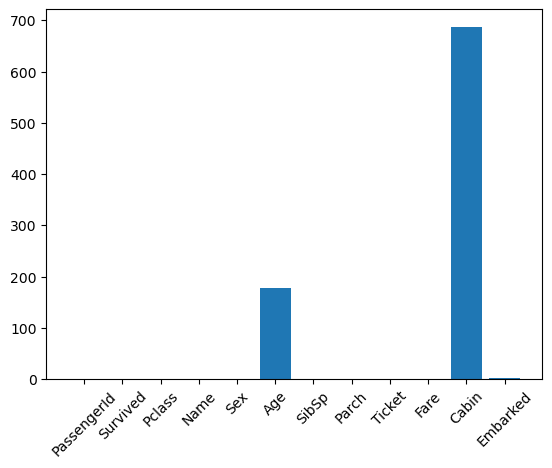


Remove column Cabin due to the majority of missing values


Filling missing values of column Age according to distribution of existing values


Missing values by removing Column Cabin and filling missing values of Age



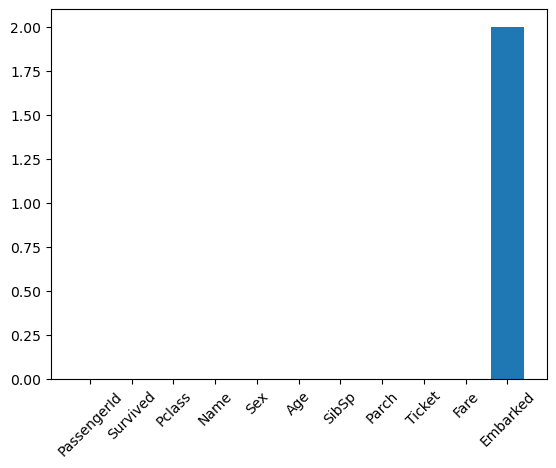


Filling missing values of column Embarked based on the frequency (mode) of existing values


No missing values after filling missing values of Embarked



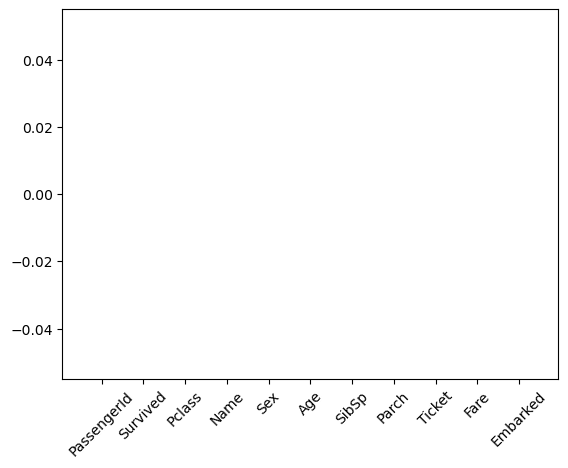


Frequency counts of non numeric columns


Name

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

Sex

male      577
female    314
Name: Sex, dtype: int64

Ticket

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

Embarked

S    646
C    168
Q     77
Name: Embarked, dtype: int64

Histogram of numerical columns in training table


Selected predictive variabl

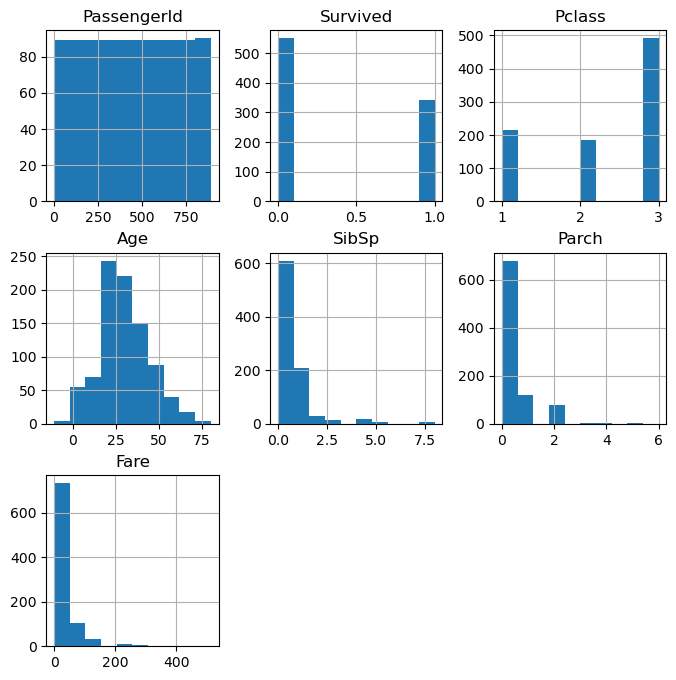

In [4]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
display(HTML('<h1><b><center>Titantic Data</center></b></h1>'))

format_ppt('Top 5 row of all columns\n')
print(train.head(5))

format_ppt('\nInfo of training table\n')
print(train.info())

g = train.columns.to_series().groupby(train.dtypes).groups
#print(g.keys())
format_ppt('\nTop 5 rows of non numeric columns\n')
print(train.select_dtypes(include=['object']).head())
format_ppt('\nDescribe numeric columns\n')
print(train.describe())
format_ppt('\nDescribe non numeric columns\n')
print(train.describe(include=['object']))
format_ppt('\nCount NaN values for each column\n')
nan_counts = train.isna().sum()
print(nan_counts)

format_ppt('\nDescribe Age column group by Sex\n')
print(train.groupby(["Sex"])['Age'].describe())

format_ppt('\nExploration and handling of missing values\n')

plot_missing_value(train)

format_ppt('\nRemove column Cabin due to the majority of missing values\n')
train.drop(['Cabin'], axis=1, inplace=True)
format_ppt('\nFilling missing values of column Age according to distribution of existing values\n')

train = filling_by_distribution(pd.concat([train, test]), train, "Age")
test = filling_by_distribution(pd.concat([train, test]), test, "Age")

train = filling_by_distribution(pd.concat([train, test]), train, "Fare")
test = filling_by_distribution(pd.concat([train, test]), test, "Fare")

format_ppt('\nMissing values by removing Column Cabin and filling missing values of Age\n')
plot_missing_value(train)

format_ppt('\nFilling missing values of column Embarked based on the frequency (mode) of existing values\n')
mode = train['Embarked'].mode()[0]
#print(mode)
# Replace missing values with the mode
train['Embarked'].fillna(mode, inplace=True)

format_ppt('\nNo missing values after filling missing values of Embarked\n')
plot_missing_value(train)

format_ppt('\nFrequency counts of non numeric columns\n')
df_object = train.select_dtypes(include=['object'])
for c1 in range(len(df_object.columns)):
    format_ppt("\n"+df_object.columns[c1]+"\n")
    df1 = df_object.iloc[:,c1].fillna('na').value_counts()
    print(df1)

format_ppt('\nHistogram of numerical columns in training table\n')
train.hist(bins=10, figsize=(8,8))

# Select predictor variables
format_ppt('\nSelected predictive variables\n')
selected_variables = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
print(selected_variables)
X_train = train[selected_variables]#.drop(['Survived', 'PassengerId', 'Ticket', "Name"], axis=1)
X_test = test[selected_variables]#.drop(['PassengerId', 'Ticket', "Name", "Cabin"], axis=1)
y_train = train['Survived']

# Convert 'male' and 'female' values to 1 and 0 respectively
format_ppt("\nConvert column Sex: male -> 0 and 'female -> 0\n")
format_ppt("\nConvert column Embarked:  S -> 0; C -> 1; Q -> 2\n")

# use factorize() to convert string values to integers
format_ppt('\nUse factorize() to convert string values to integers\n')
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train['Embarked'] = pd.factorize(X_train['Embarked'])[0]
X_train['Sex'] = pd.factorize(X_train['Sex'])[0]
X_test['Embarked'] = pd.factorize(X_test['Embarked'])[0]
X_test['Sex'] = pd.factorize(X_test['Sex'])[0]

In [5]:
#test.head()
nan_counts = test.isna().sum()
print(nan_counts)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


# Scatter plots of each pair of columns with correlation coefficients


Correlation between Survived and all other variables

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.041993
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
dtype: float64

Plots of each pairs of columns with correlation coefficients



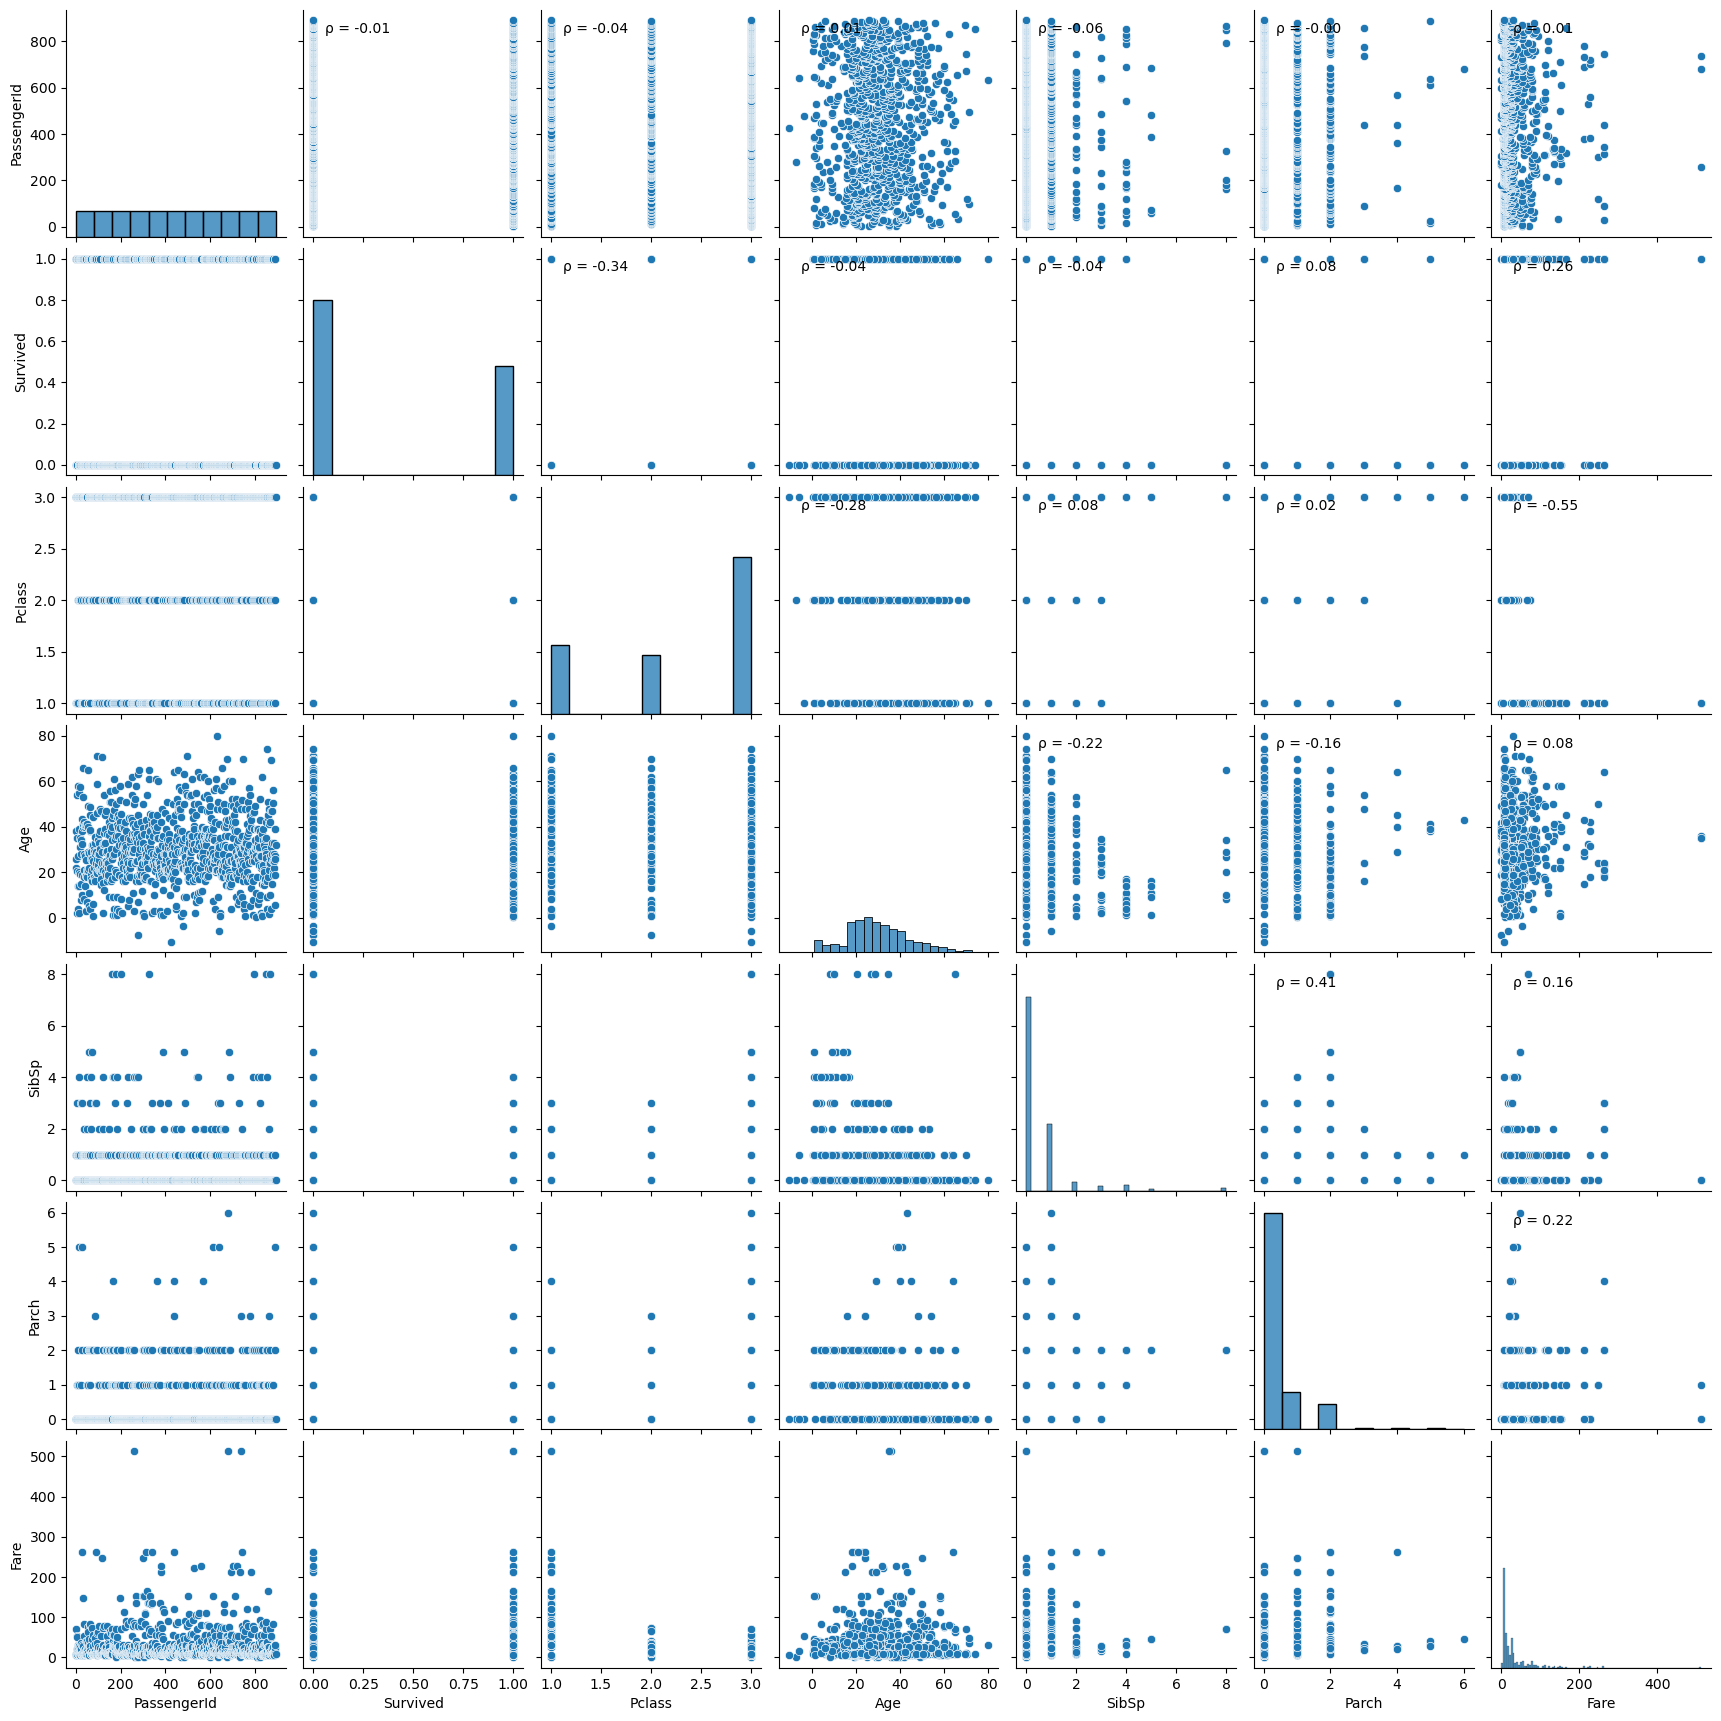

In [6]:
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt 

def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

# Extract the predicted binary variable into y and the input variables into X
X = train.drop(['Survived'], axis=1)
y = train['Survived']

# calculate correlation between binary_var and all other variables
corr_matrix = train.corrwith(train['Survived'])
format_ppt("\nCorrelation between Survived and all other variables\n")
print(corr_matrix)

# Plot the data
#sns.pairplot(data=train, x_vars=X.columns, y_vars='Survived', hue='Survived', 
#             diag_kind='hist', height = 5, aspect=1.5)
format_ppt('\nPlots of each pairs of columns with correlation coefficients\n')
g = sns.pairplot(train)
g.map_upper(corrfunc)
plt.show()

# Train model and prediction by LogisticRegression

In [7]:
# Import required libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Normalize the input features
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the outcomes for the test data
y_pred = model.predict(X_test)
print(len(y_pred))
print(X_test.describe())
print(X_test.info())
print(X_test.head())

418
             Pclass           Sex           Age         SibSp         Parch  \
count  4.180000e+02  4.180000e+02  4.180000e+02  4.180000e+02  4.180000e+02   
mean   1.487380e-17 -3.824692e-17  8.711798e-17 -1.593622e-17 -2.974760e-17   
std    1.001198e+00  1.001198e+00  1.001198e+00  1.001198e+00  1.001198e+00   
min   -1.505120e+00 -7.559289e-01 -2.174113e+00 -4.994700e-01 -4.002477e-01   
25%   -1.505120e+00 -7.559289e-01 -6.587916e-01 -4.994700e-01 -4.002477e-01   
50%    8.734819e-01 -7.559289e-01 -1.469748e-01 -4.994700e-01 -4.002477e-01   
75%    8.734819e-01  1.322876e+00  6.757862e-01  6.169924e-01 -4.002477e-01   
max    8.734819e-01  1.322876e+00  3.206839e+00  8.432229e+00  8.781044e+00   

               Fare      Embarked  
count  4.180000e+02  4.180000e+02  
mean  -9.349247e-17 -1.168656e-17  
std    1.001198e+00  1.001198e+00  
min   -6.393441e-01 -1.955941e+00  
25%   -4.977866e-01 -2.310816e-01  
50%   -3.802062e-01 -2.310816e-01  
75%   -7.460561e-02 -2.310816e-0

# Training model by Random Forest

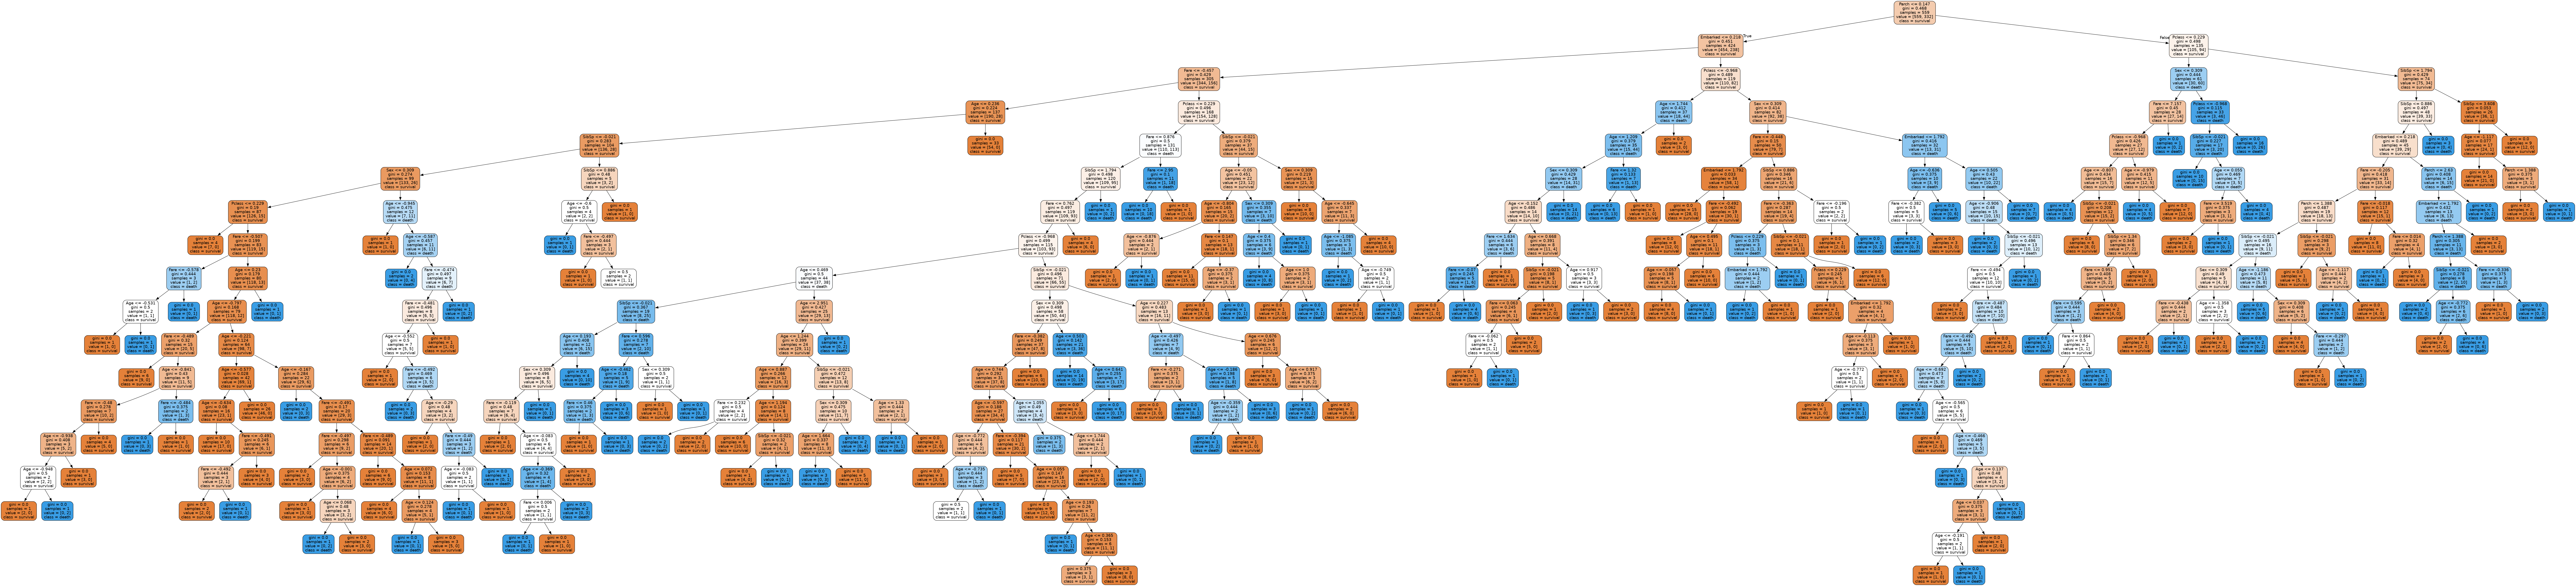

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
from PIL import Image

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
y_train1 = np.where(y_train == 0, "death", "survival")
# Fit the model to the training data
rf.fit(X_train, y_train1)

# Predict the target variable for the test set

y_pred = rf.predict(X_test)
df1 = pd.DataFrame()
df1['Survived'] = pd.DataFrame(y_pred)
X_output = pd.concat([df1, test[['PassengerId']]], axis = 1)
X_output.to_csv('predict.csv', index=False)
X_output

tree = rf.estimators_[np.argmax(rf.feature_importances_)]

feature_names = X_train.columns
target_names = list(set(y_train1))

# Export the tree to a Graphviz dot file
dot_data = export_graphviz(tree, out_file=None, feature_names=feature_names,
                           class_names=target_names, filled=True, rounded=True)

# Create a Graph object from the DOT data
graph = graphviz.Source(dot_data)

# Save the graph as an image file (e.g., PNG)
graph.format = 'png'
graph.render("Improved_RFTree", view=False)

# Display the PNG file
Image.open('Improved_RFTree.png')